In [115]:
import keras
print(f"Keras Version: {keras.__version__}")
import tensorflow as tf
print(f"Tensorflow Version {tf.__version__}")

Keras Version: 1.2.2
Tensorflow Version 1.1.0


[Keras](https://keras.io/) is a high level wrapper (API) for Tensorflow and Theano which aims to make them easier to use. Tensorflow gets quite verbose and there is a lot of detail to handle, which Keras trys to abstract away to sane defaults, while allowing the option to tinker with the tensors where wanted.

# the data

To get a feel for Keras, I'm seeing how it goes with MNIST. 

Keras already has some [datasets included](https://keras.io/datasets/), so using the ever popular mnist:

> ** MNIST database of handwritten digits**

> Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Checking the data:

In [3]:
f"Shapes x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'Shapes x_train: (60000, 28, 28), y_train: (60000,), x_test: (10000, 28, 28), y_test: (10000,)'

The train and test images are `28x28` sized images, which we need to reshape into a 1d vector to make our super simple NN deal with. 

Now, it's a good idea to always eyeball the data, so here goes:

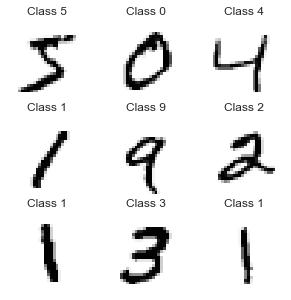

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,3, figsize=(5,5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f"Class {y_train[i]}")
    ax.set_xticks([]) , ax.set_yticks([]) 

In [101]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

ok, we've seen the data, but we need to preprocess it into a neural net friendly shape. 

## preprocessing the data

The image data is 60K `28x28` images, and the image test data is 10K `28x28` images. We want the number of images to stay the same, while the 28x28 should become 784:

In [106]:
X_train = x_train.reshape(-1, 28*28)
X_test = x_test.reshape(-1, 28*28)
x_train.shape, X_train.shape, x_test.shape, X_test.shape

((60000, 28, 28), (60000, 784), (10000, 28, 28), (10000, 784))

that was easy! Moving on to the image labels:

the image labels are stored as a simple numpy array, with each entry telling us what number each corresponding drawing is. Since our NN will spit out a prediction of the likelyhood of what number the drawing is, our NN will work better with the y data [one hot encoded](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science).

In [11]:
print("Existing image labels")
print(f"y_train: {y_train[:10]} | y_test: {y_test[:10]}")

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(f"Y_Train encoded: {Y_train[0]}")
print(f"Y_test encoded: {Y_test[0]}")

Existing image labels
y_train: [5 0 4 1 9 2 1 3 1 4] | y_test: [7 2 1 0 4 1 4 9 5 9]
Y_Train encoded: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Y_test encoded: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


so now our data is all ready to go!

# A simple neural net

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()

model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# we can either use part of the training set as validation data or provide a validation set
#model.fit(X_train, Y_train, nb_epoch=10, batch_size=64, validation_split=0.1)
model.fit(X_train, Y_train, nb_epoch=10, batch_size=128, shuffle=True, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 6.0309 - acc: 0.6044 - val_loss: 4.3232 - val_acc: 0.7217
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 4.0527 - acc: 0.7317 - val_loss: 2.8648 - val_acc: 0.8099
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 3.0998 - acc: 0.7912 - val_loss: 2.8480 - val_acc: 0.8082
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 1.8784 - acc: 0.8621 - val_loss: 1.1092 - val_acc: 0.9163
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 1.3703 - acc: 0.8896 - val_loss: 0.9750 - val_acc: 0.9181
Epoch 6/10
26368/60000 [============>.................] - ETA: 2s - loss: 1.1894 - acc: 0.8938- ETA: 6s - 

In [ ]:
model.evaluate(X_test, Y_test, batch_size=128)